# SARIMA MODEL Implementation


In [31]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model  import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace import tools 
import pandas as pd
from pmdarima import auto_arima
from datetime import datetime

For this we will be using catfish data

In [26]:
df =   pd.read_csv("catfish.csv",
              index_col = "Date",
              parse_dates = True)


In [27]:
df.head()

,Total
Date,
1986-01-01,9034
1986-02-01,9596
1986-03-01,10558
1986-04-01,9002
1986-05-01,9239


In [28]:
df.shape

(324, 1)

In [32]:
start_date = datetime(1996,1,1)
end_date = datetime(2000,1,1)
lim_catfish_sales = df[start_date:end_date]

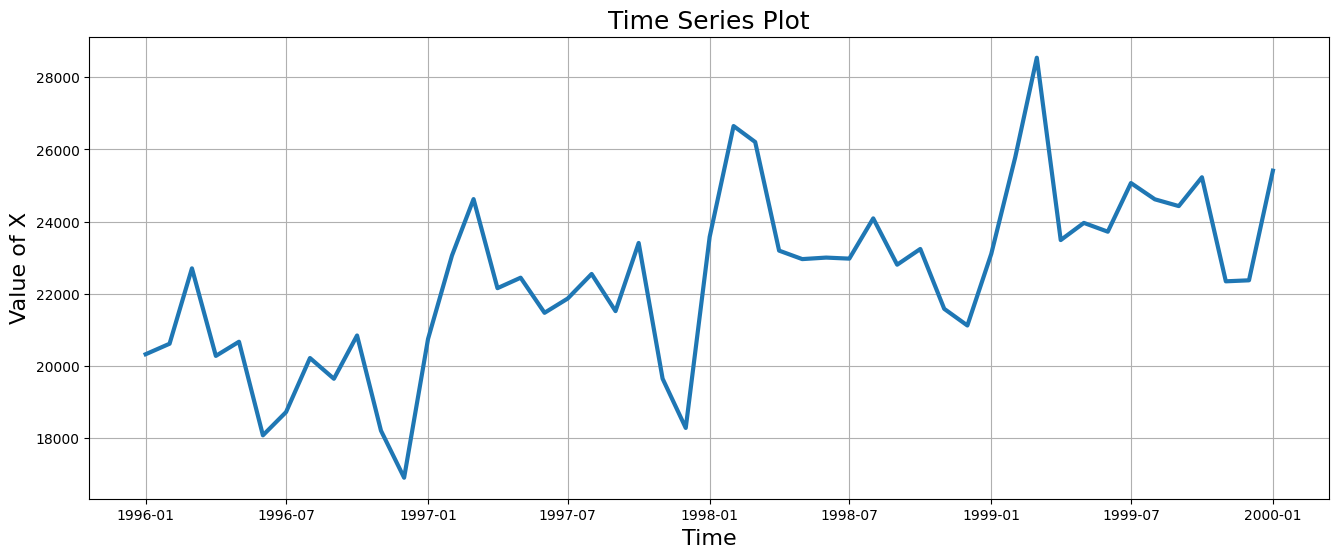

In [34]:
def plot_series(X, title='Time Series Plot', y_label='Value of X', figsize=(16, 6)):
    fig = plt.figure(figsize=figsize)
    plt.plot(X, linewidth=3)
    plt.title(title, fontsize=18)
    plt.xlabel('Time', fontsize=16)
    plt.ylabel(y_label, fontsize=16)
    plt.grid()
    plt.show()

def plotCorr(x):
    plot_acf(x)
    plot_pacf(x)

plot_series(lim_catfish_sales)

Removing the trend

In [37]:
p_threshold = 0.05

order_d = 0
lim_catfish_sales_diff = lim_catfish_sales.copy()

# loop to get stationary data 
while adfuller(lim_catfish_sales_diff)[1] > p_threshold:
    order_d += 1
    lim_catfish_sales_diff = tools.diff(lim_catfish_sales_diff)

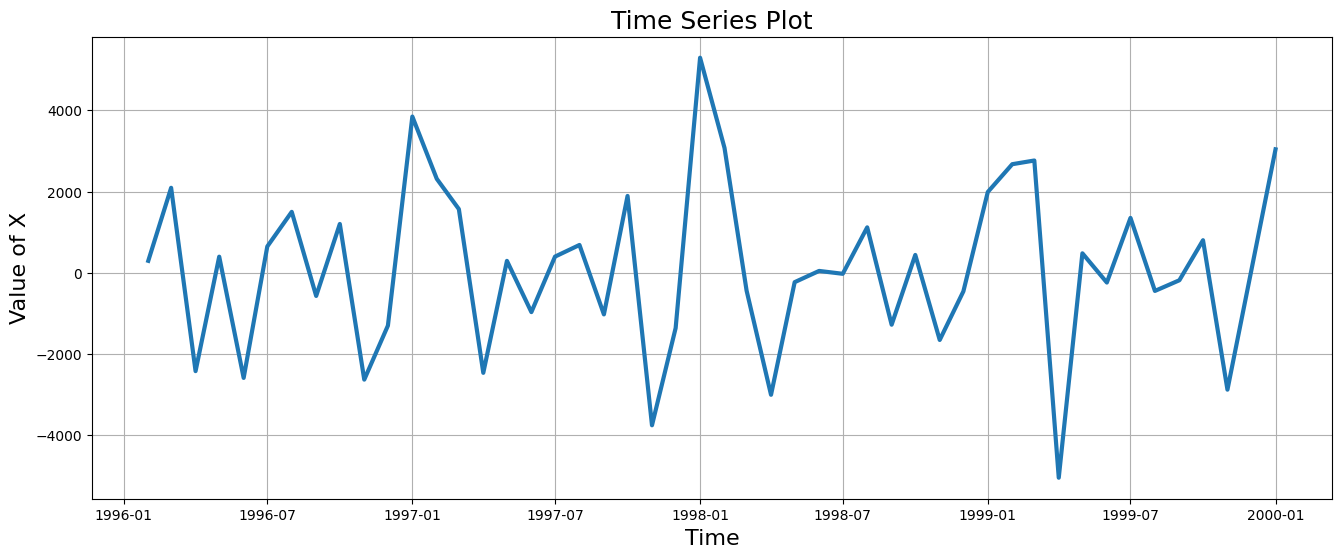

In [39]:
d = order_d
plot_series(lim_catfish_sales_diff)

c:\Users\dell\OneDrive\Documents\FuseMachine AI fellowship\Assignment Deep learning\assignment\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


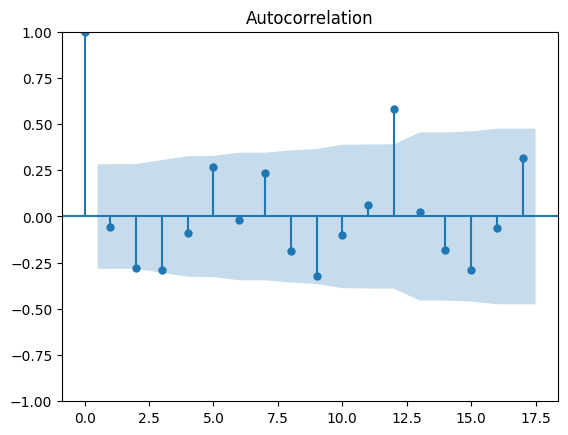

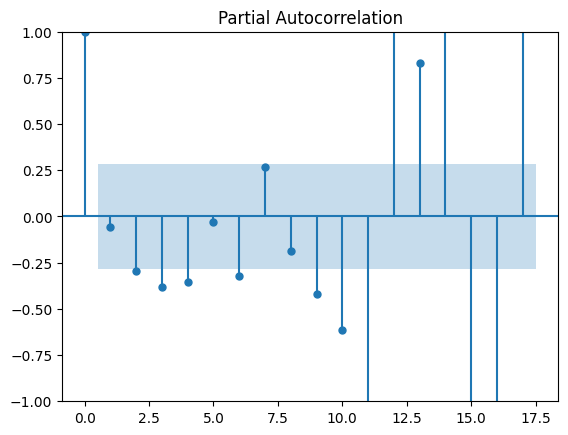

In [40]:
plotCorr(lim_catfish_sales_diff)

In [41]:
lim_catfish_sales_diff.shape

(48, 1)

In [45]:
#training and test set
training = lim_catfish_sales.iloc[:-12,:]
test = lim_catfish_sales.iloc[-12:, :] # taking last 1 month for testing

In [48]:
training.shape

(37, 1)

# Fiting SARIMA model

In [49]:
#SARIMA model
model = auto_arima(y = lim_catfish_sales,
                   m = 12,trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=621.371, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=622.272, Time=0.05 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=622.864, Time=0.05 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=664.240, Time=0.01 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=622.288, Time=0.06 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=621.855, Time=0.04 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=623.491, Time=0.12 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=623.340, Time=0.08 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=623.416, Time=0.03 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=625.343, Time=0.06 sec

Best model:  ARIMA(0,0,0)(0,1,0)[12] intercept
Total fit time: 1.167 seconds


In [50]:
# define model
model = ARIMA(lim_catfish_sales, order=(0,0, 0), seasonal_order=(0,1,0, 12), )
#fit the model
model_fit = model.fit()
#summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                   49
Model:             ARIMA(0, 1, 0, 12)   Log Likelihood                -331.120
Date:                Tue, 31 Oct 2023   AIC                            664.240
Time:                        22:05:46   BIC                            665.851
Sample:                    01-01-1996   HQIC                           664.808
                         - 01-01-2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       3.41e+06   1.18e+06      2.887      0.004    1.09e+06    5.73e+06
Ljung-Box (L1) (Q):                   1.36   Jarque-Bera (JB):                 0.39
Prob(Q):                              0.24   Pr

c:\Users\dell\OneDrive\Documents\FuseMachine AI fellowship\Assignment Deep learning\assignment\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\dell\OneDrive\Documents\FuseMachine AI fellowship\Assignment Deep learning\assignment\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\dell\OneDrive\Documents\FuseMachine AI fellowship\Assignment Deep learning\assignment\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Date
1999-02-01    26650.0
1999-03-01    26207.0
1999-04-01    23195.0
1999-05-01    22960.0
1999-06-01    23002.0
1999-07-01    22973.0
1999-08-01    24089.0
1999-09-01    22805.0
1999-10-01    23241.0
1999-11-01    21581.0
1999-12-01    21119.0
2000-01-01    23107.0
Name: predicted_mean, dtype: float64

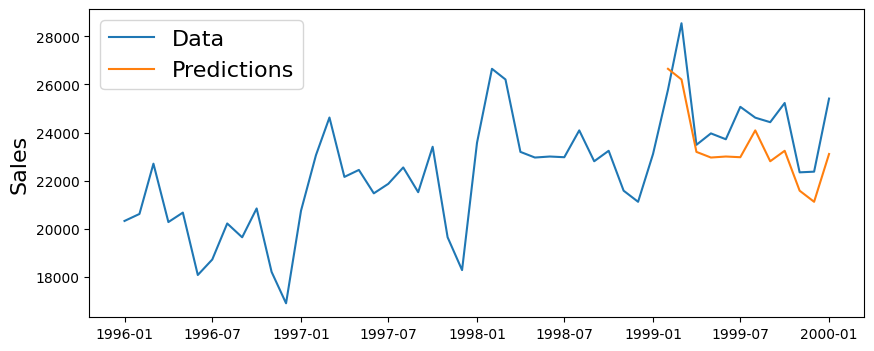

In [55]:
predictions = model_fit.predict(len(test))
predictions = pd.Series(predictions, index=test.index)
plt.figure(figsize=(10,4))

plt.plot(lim_catfish_sales)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.ylabel('Sales', fontsize=16)
predictions

In [59]:
predictions

Date
1999-02-01    26650.0
1999-03-01    26207.0
1999-04-01    23195.0
1999-05-01    22960.0
1999-06-01    23002.0
1999-07-01    22973.0
1999-08-01    24089.0
1999-09-01    22805.0
1999-10-01    23241.0
1999-11-01    21581.0
1999-12-01    21119.0
2000-01-01    23107.0
Name: predicted_mean, dtype: float64